In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [14]:
digits = load_digits()
X = digits.data
y = digits.target
classes = np.unique(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split off test set (fixed for evaluation)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Simulate incoming data in 10 chunks
X_chunks = np.array_split(X_train_all, 10)
y_chunks = np.array_split(y_train_all, 10)

In [15]:
model = SGDClassifier(random_state=42)
f1_scores = []
conf_matrices = []

# Initial training with first chunk
model.partial_fit(X_chunks[0], y_chunks[0], classes=classes)

# Evaluate after first chunk
y_pred = model.predict(X_test)
f1_scores.append(f1_score(y_test, y_pred, average='macro'))
conf_matrices.append(confusion_matrix(y_test, y_pred))

In [16]:
for i in range(1, len(X_chunks)):
    model.partial_fit(X_chunks[i], y_chunks[i])

    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

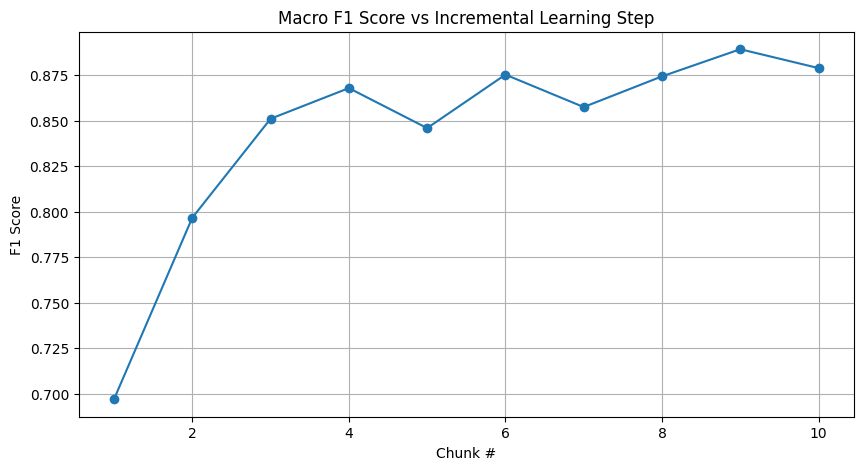

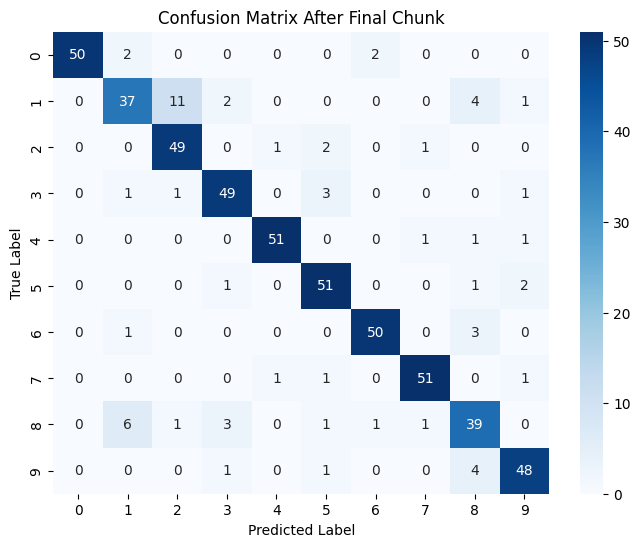

In [17]:
# Plot F1 scores over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), f1_scores, marker='o')
plt.title("Macro F1 Score vs Incremental Learning Step")
plt.xlabel("Chunk #")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

# Show final confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix After Final Chunk")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
